In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../../Cleaning/olympics/womens/cleaned_womens2012to2020bb')
bb = pd.read_csv('../../../kaggle-data/olympics_w_bb.csv')


In [6]:
df.head()

,Rank,Gymnast,Nation,D Score,E Score,Pen.,Total,year
0,1,Deng Linlin,China,6.6,9.000,0.0,15.600,2012
1,2,Sui Lu,China,6.5,9.000,0.0,15.500,2012
2,3,Aly Raisman,United States,6.3,8.766,0.0,15.066,2012
3,4,Cătălina Ponor,Romania,6.6,8.466,0.0,15.066,2012
4,5,Ksenia Afanasyeva,Russia,5.8,8.783,0.0,14.583,2012


In [7]:
bb.head()

,Name,Sex,Age,Height,Weight,NOC,Year,Event,Medal
0,Irene Abel,F,19.0,160.0,48.0,GDR,1972,Balance Beam,none
1,Katja Abel,F,25.0,165.0,55.0,GER,2008,Balance Beam,none
2,Ruth Abeles,F,18.0,153.0,48.0,ISR,1960,Balance Beam,none
3,Elisabeta Abrudeanu,F,26.0,NaN,NaN,ROU,1952,Balance Beam,none
4,Ginko Abukawa-Chiba,F,22.0,148.0,46.0,JPN,1960,Balance Beam,none


,Name,Sex,Age,Height,Weight,NOC,Year,Event,Medal
8,Jonna Eva-Maj Adlerteg,F,17.0,153.0,38.0,SWE,2012,Balance Beam,none
12,Kseniya Dmitriyevna Afanasyeva,F,20.0,158.0,48.0,RUS,2012,Balance Beam,none
22,Tabea Lara Alt,F,16.0,158.0,50.0,GER,2016,Balance Beam,none
24,Isabella del Carmen Amado Medrano,F,19.0,155.0,59.0,PAN,2016,Balance Beam,none
30,Rebeca Rodrigues de Andrade,F,17.0,151.0,46.0,BRA,2016,Balance Beam,none


In [14]:
# Define a mapping dictionary from full country names to abbreviations
country_mapping = {
    'Romania': 'ROU',
    'United States': 'USA',
    'Russia': 'RUS',
    'Canada': 'CAN',
    'China': 'CHN'
}

# Use the replace function to replace the full country names with abbreviations
df['Nation'] = df['Nation'].replace(country_mapping)


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
medals = df[df['Rank'].isin([1.0, 2.0, 3.0])]

In [17]:
medals

,Rank,Gymnast,Nation,D Score,E Score,Pen.,Total,year
0,1,Deng Linlin,CHN,6.6,9.000,0.0,15.600,2012
1,2,Sui Lu,CHN,6.5,9.000,0.0,15.500,2012
2,3,Aly Raisman,USA,6.3,8.766,0.0,15.066,2012
8,1,Sanne Wevers,NED,6.6,8.866,0.0,15.466,2016
9,2,Laurie Hernandez,USA,6.4,8.933,0.0,15.333,2016
10,3,Simone Biles,USA,6.5,8.233,0.0,14.733,2016
16,1,Guan Chenchen,CHN,6.6,8.033,0.0,14.633,2020
17,2,Tang Xijing,CHN,6.0,8.233,0.0,14.233,2020
18,3,Simone Biles,USA,6.1,7.900,0.0,14.000,2020


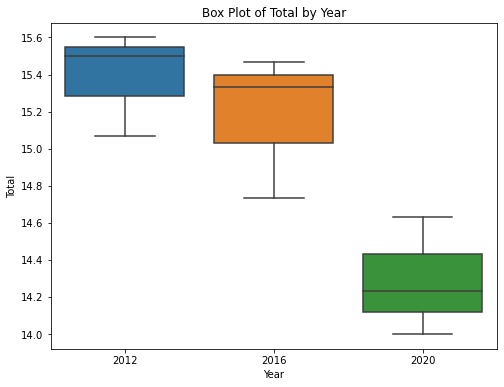

In [18]:
# Box plot of 'bb' by 'year'
plt.figure(figsize=(8, 6))
sns.boxplot(data=medals, x='year', y='Total')
plt.title('Box Plot of Total by Year')
plt.xlabel('Year')
plt.ylabel('Total')
plt.show()

In [19]:
medals["Total"].min()

14.0

In [21]:
medals['Nation'].value_counts()

Nation
CHN    4
USA    4
NED    1
Name: count, dtype: int64

In [10]:
years_to_filter = [2016, 2012, 2020]

# Create a new DataFrame for the specified years
filtered_df = bb[bb['Year'].isin(years_to_filter)]



In [12]:
bb = filtered_df.copy()

In [13]:
bb

,Name,Sex,Age,Height,Weight,NOC,Year,Event,Medal
8,Jonna Eva-Maj Adlerteg,F,17.0,153.0,38.0,SWE,2012,Balance Beam,none
12,Kseniya Dmitriyevna Afanasyeva,F,20.0,158.0,48.0,RUS,2012,Balance Beam,none
22,Tabea Lara Alt,F,16.0,158.0,50.0,GER,2016,Balance Beam,none
24,Isabella del Carmen Amado Medrano,F,19.0,155.0,59.0,PAN,2016,Balance Beam,none
30,Rebeca Rodrigues de Andrade,F,17.0,151.0,46.0,BRA,2016,Balance Beam,none
...,...,...,...,...,...,...,...,...,...
1473,Toni-Ann Natasha Williams,F,20.0,155.0,52.0,JAM,2016,Balance Beam,none
1482,"Hiu Ying ""Angel"" Wong",F,25.0,153.0,50.0,HKG,2012,Balance Beam,none
1483,Rose-Kaying Woo,F,16.0,145.0,46.0,CAN,2016,Balance Beam,none
1494,Yao Jinnan,F,17.0,145.0,35.0,CHN,2012,Balance Beam,none


In [16]:
bb = bb.drop(columns=['Event', 'Sex'])


In [18]:
bb.head()

,Name,Age,Height,Weight,NOC,Year,Medal
8,Jonna Eva-Maj Adlerteg,17.0,153.0,38.0,SWE,2012,none
12,Kseniya Dmitriyevna Afanasyeva,20.0,158.0,48.0,RUS,2012,none
22,Tabea Lara Alt,16.0,158.0,50.0,GER,2016,none
24,Isabella del Carmen Amado Medrano,19.0,155.0,59.0,PAN,2016,none
30,Rebeca Rodrigues de Andrade,17.0,151.0,46.0,BRA,2016,none


In [19]:
df.head()

,Rank,Gymnast,Nation,D Score,E Score,Pen.,Total,year
0,1,Deng Linlin,China,6.6,9.000,0.0,15.600,2012
1,2,Sui Lu,China,6.5,9.000,0.0,15.500,2012
2,3,Aly Raisman,United States,6.3,8.766,0.0,15.066,2012
3,4,Cătălina Ponor,Romania,6.6,8.466,0.0,15.066,2012
4,5,Ksenia Afanasyeva,Russia,5.8,8.783,0.0,14.583,2012


In [22]:
df['Nation'].unique()

array(['CHN', 'USA', 'ROU', 'RUS', 'NED', 'FRA', 'BRA', 'CAN', 'JPN',
       'ROC'], dtype=object)

In [21]:
nation_to_noc_mapping = {
    'China': 'CHN',
    'United States': 'USA',
    'Romania': 'ROU',
    'Russia': 'RUS',
    'NED': 'NED',
    'USA': 'USA',
    'FRA': 'FRA',
    'BRA': 'BRA',
    'CHN': 'CHN',
    'ROU': 'ROU',
    'CAN': 'CAN',
    'JPN': 'JPN',
    'ROC': 'ROC'
}

# Use the mapping to replace the values in the "Nation" column
df['Nation'] = df['Nation'].map(nation_to_noc_mapping)
